In [ ]:
#convert to datetime series
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)
print(time_series)

In [ ]:
#partial string indexing and slicing
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']


In [ ]:
#reindexing
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4
print(sum14)

In [ ]:
#Resampling time series data
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6H').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()
print(df2)

In [ ]:
#method chaining
# Extract temperature data for August: august
august = df['Temperature'].loc['2010-08']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['Temperature'].loc['2010-02']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

print(february_lows)

In [ ]:
#Rolling mean and frequency
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-08-01':'2010-08-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed': smoothed, 'unsmoothed': unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

In [ ]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

In [ ]:
#manipulating time series data
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip(' ')

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
print(stats)
print(daily_departures)

In [ ]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1 - ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

In [ ]:
#time zones conversion
# Build a Boolean mask to filter for the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'
#print(type(mask))

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'] )

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')

In [ ]:
# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df.Date)

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()

In [ ]:
# Plot the summer data
df.Temperature['2010-06':'2010-08'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()


In [5]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=[0], index_col=[0])
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


In [6]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


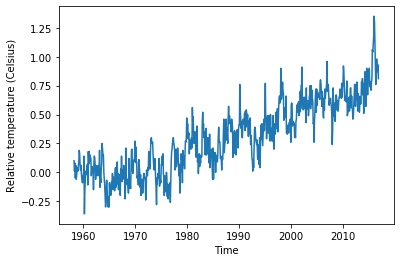

In [7]:
#plotting time series
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

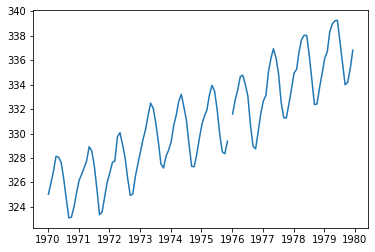

In [8]:
#Using a time index to zoom in on a particular period within the time-series
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01": "1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### Plotting time-series with different variables

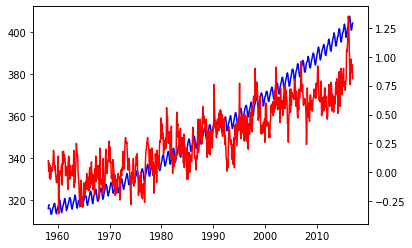

In [9]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

In [10]:
#create a function
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

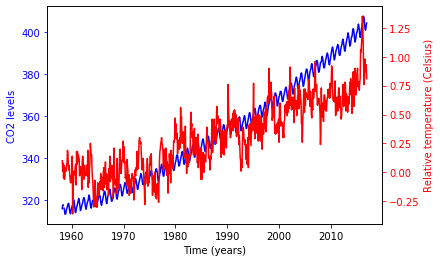

In [12]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()

### Annotation

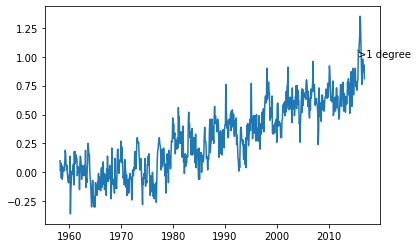

In [13]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate_change.index, climate_change['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate('>1 degree', xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

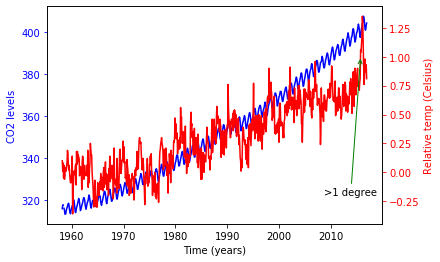

In [15]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", "Time (years)", "CO2 levels")


# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", "Relative temp (Celsius)")


# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xytext=(pd.Timestamp('2008-10-06'), -0.2), xy=(pd.Timestamp('2015-10-06'), 1), arrowprops={'arrowstyle': '->', 'color': 'green'})


plt.show()

### Quantitative comparisons: 
#### Bar Charts

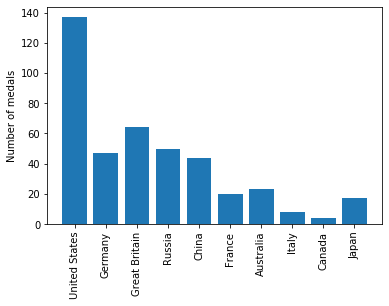

In [16]:
medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)

fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals['Gold'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

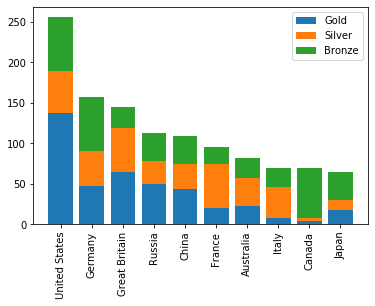

In [20]:
fig, ax = plt.subplots()

ax.set_xticklabels(medals.index, rotation=90)

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label='Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold'] + medals['Silver'], label='Bronze')

# Display the legend
ax.legend()

plt.show()

#### Histograms

In [21]:
df = pd.read_csv('datasets/summer2016.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2014 non-null   int64  
 1   ID          2014 non-null   int64  
 2   Name        2014 non-null   object 
 3   Sex         2014 non-null   object 
 4   Age         2014 non-null   float64
 5   Height      2014 non-null   float64
 6   Weight      2014 non-null   float64
 7   Team        2014 non-null   object 
 8   NOC         2014 non-null   object 
 9   Games       2014 non-null   object 
 10  Year        2014 non-null   int64  
 11  Season      2014 non-null   object 
 12  City        2014 non-null   object 
 13  Sport       2014 non-null   object 
 14  Event       2014 non-null   object 
 15  Medal       2014 non-null   object 
dtypes: float64(3), int64(3), object(10)
memory usage: 251.9+ KB


In [26]:
df.sample(5)

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
345,47169,24313,Rsul unayev,M,25.0,171.0,66.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",Bronze
280,38680,19901,Tina Alexandria Charles,F,27.0,193.0,88.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,Gold
1879,255969,128165,"Kenneth Maxwell ""Ken"" Wallace",M,33.0,190.0,90.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Doubles, 1,000 metres",Bronze
1410,195193,97981,Alicia Quirk,F,24.0,173.0,64.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,Gold
1324,182836,91887,Mariya Valeryevna Paseka,F,21.0,161.0,48.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Horse Vault,Silver


In [33]:
mens_rowing = df.query('@df.Sex == "M" and @df.Sport == "Rowing"')
mens_gymnastics = df.query('@df.Sex == "M" and @df.Sport == "Gymnastics"')

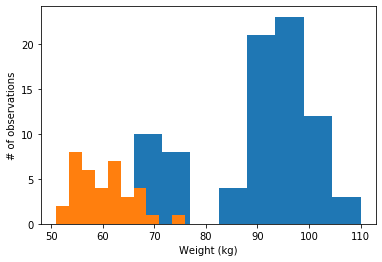

In [34]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel('Weight (kg)')

# Set the y-axis label to "# of observations"
ax.set_ylabel('# of observations')

plt.show()

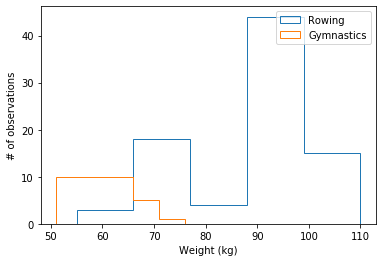

In [35]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], label='Rowing', histtype='step', bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label='Gymnastics', histtype='step', bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

### Statistical Plotting

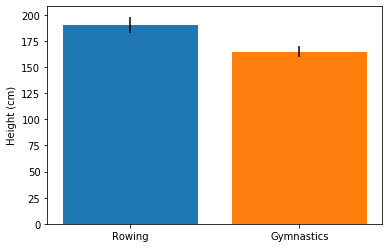

In [36]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

NameError: name 'seattle_weather' is not defined

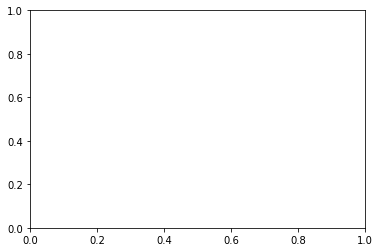

In [37]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'], yerr=seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'], yerr=austin_weather['MLY-TAVG-STDDEV'])

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


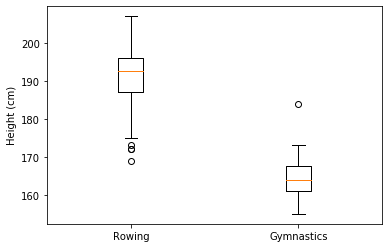

In [40]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()